# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


# Preprocessing data

In [2]:
images = []

In [3]:
os.chdir('cell_images/')

In [4]:
for i in os.listdir('Uninfected/'):
    img = cv2.imread(os.path.join('Uninfected/',i),cv2.IMREAD_GRAYSCALE)
    if np.shape(img)!=():
        resized = cv2.resize(img,(48,48),interpolation=cv2.INTER_AREA)
        blur = cv2.bilateralFilter(resized,5,25,25)
        images.append(blur)
for i in os.listdir('Parasitized/'):
    img = cv2.imread(os.path.join('Parasitized/',i),cv2.IMREAD_GRAYSCALE)
    if np.shape(img)!=():
        resized = cv2.resize(img,(48,48),interpolation=cv2.INTER_AREA)
        blur = cv2.bilateralFilter(resized,5,25,25)
        images.append(blur)

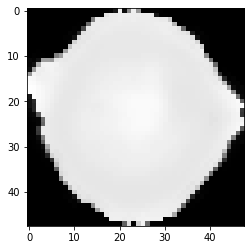

In [5]:
plt.imshow(images[0],cmap='gray')

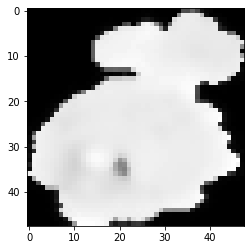

In [6]:
plt.imshow(images[13780],cmap='gray')

In [7]:
pos = np.ones(13779)
neg = np.zeros(13779)

In [8]:
labels = np.concatenate((pos,neg))

In [9]:
images = np.array(images,dtype='uint8')

In [10]:
images.shape

(27558, 48, 48)

In [11]:
labels.shape

(27558,)

In [12]:
labels = labels.reshape(27558,1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)

In [14]:
X_test.shape

(9095, 48, 48)

In [15]:
X_train.shape

(18463, 48, 48)

In [16]:
X_test = X_test.reshape(9095,48,48,1)
X_train = X_train.reshape(18463,48,48,1)
X_train = X_train/255
X_test = X_test/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

W1021 20:55:25.530187 12480 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1021 20:55:25.545151 12480 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1021 20:55:25.548106 12480 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1021 20:55:25.579541 12480 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1021 20:55:25.608464 12480

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 64)          0         
__________

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train,batch_size=128,epochs=20,verbose=1,validation_data=(X_test, y_test))

W1021 20:55:25.746096 12480 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1021 20:55:25.773056 12480 deprecation_wrapper.py:119] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W1021 20:55:25.867281 12480 deprecation.py:323] From C:\Users\gaurav\Anaconda3\envs\ML-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 18463 samples, validate on 9095 samples
Epoch 1/20
18463/18463 [==============================] - 8s 427us/step - loss: 0.6777 - acc: 0.5710 - val_loss: 0.6371 - val_acc: 0.6290
Epoch 2/20
18463/18463 [==============================] - 4s 197us/step - loss: 0.4117 - acc: 0.8008 - val_loss: 0.1804 - val_acc: 0.9311
Epoch 3/20
18463/18463 [==============================] - 4s 197us/step - loss: 0.1681 - acc: 0.9395 - val_loss: 0.1447 - val_acc: 0.9478
Epoch 4/20
18463/18463 [==============================] - 4s 197us/step - loss: 0.1478 - acc: 0.9480 - val_loss: 0.1422 - val_acc: 0.9479
Epoch 5/20
18463/18463 [==============================] - 4s 197us/step - loss: 0.1334 - acc: 0.9524 - val_loss: 0.1395 - val_acc: 0.9522
Epoch 6/20
18463/18463 [==============================] - 4s 197us/step - loss: 0.1219 - acc: 0.9556 - val_loss: 0.1368 - val_acc: 0.9509
Epoch 7/20
18463/18463 [==============================] - 4s 197us/step - loss: 0.1148 - acc: 0.9595 - val_loss: 0.1424 - v

# Generating Results

In [20]:
predicted = model.predict_classes(X_test)

In [21]:
y_test_n = np.argmax(y_test,axis=1)

In [22]:
print(classification_report(predicted, y_test_n))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4482
           1       0.96      0.95      0.95      4613

    accuracy                           0.95      9095
   macro avg       0.95      0.95      0.95      9095
weighted avg       0.95      0.95      0.95      9095



In [23]:
model.save('model.h5')